In [1]:
!conda install -y -c conda-forge imbalanced-learn

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         110 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forg

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
csv_files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(csv_file)
        csv_files.append(csv_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos2019-5percent/5percent/5percent_Portmap.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_LDAP.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_UDP.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_Syn.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_UDPLag.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_NetBIOS.csv
/kaggle/input/ddos2019-5percent/5percent/5percent_MSSQL.csv


In [3]:
df_original = pd.concat([pd.read_csv(file, index_col=0) for file in csv_files], ignore_index=True)
print(df_original.Label.unique())
print(df_original['Label'].value_counts())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


['Portmap' 'BENIGN' 'LDAP' 'NetBIOS' 'UDP' 'MSSQL' 'Syn' 'UDPLag']
MSSQL      289337
Syn        244612
UDP        193305
NetBIOS    182684
LDAP        96006
Portmap      9351
BENIGN       2834
UDPLag         97
Name: Label, dtype: int64


In [4]:
# drop two type of attacks: portmap and UDPLag
df = df_original.copy()
df = df.loc[~df['Label'].isin(['Portmap', 'UDPLag'])]
print(df.Label.unique())
print(df['Label'].value_counts())

['BENIGN' 'LDAP' 'NetBIOS' 'UDP' 'MSSQL' 'Syn']
MSSQL      289337
Syn        244612
UDP        193305
NetBIOS    182684
LDAP        96006
BENIGN       2834
Name: Label, dtype: int64


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet 

In [6]:
df.head()

,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
3,51489,172.217.9.226-192.168.50.8-443-59665-6,192.168.50.8,59665,172.217.9.226,443,6,2018-11-03 09:37:01.880001,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
12,119554,192.168.50.6-4.2.2.4-60136-53-17,192.168.50.6,60136,4.2.2.4,53,17,2018-11-03 09:50:56.664466,20787,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
16,46351,192.168.50.6-4.2.2.4-63041-53-17,192.168.50.6,63041,4.2.2.4,53,17,2018-11-03 09:48:55.666471,20926,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
26,38385,192.168.50.6-74.208.236.171-54944-80-6,74.208.236.171,80,192.168.50.6,54944,6,2018-11-03 09:34:26.964322,298,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,BENIGN
34,1026,192.168.50.6-23.194.142.213-55031-443-6,23.194.142.213,443,192.168.50.6,55031,6,2018-11-03 09:44:49.053986,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,BENIGN


In [7]:
drop_columns = ['Unnamed: 0.1', 'Flow ID', 'Source IP', 'Source Port', 
                          'Destination IP', 'Destination Port','Timestamp', 'Flow Bytes/s', 
                          'Flow Packets/s', 'SimillarHTTP']

In [8]:
df.drop(drop_columns, axis=1, inplace=True)

In [9]:
print(df.shape)
print(df.columns)

(1008778, 78)
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag C

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008778 entries, 3 to 1018225
Data columns (total 78 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Protocol                     1008778 non-null  int64  
 1   Flow Duration                1008778 non-null  int64  
 2   Total Fwd Packets            1008778 non-null  int64  
 3   Total Backward Packets       1008778 non-null  int64  
 4   Total Length of Fwd Packets  1008778 non-null  float64
 5   Total Length of Bwd Packets  1008778 non-null  float64
 6   Fwd Packet Length Max        1008778 non-null  float64
 7   Fwd Packet Length Min        1008778 non-null  float64
 8   Fwd Packet Length Mean       1008778 non-null  float64
 9   Fwd Packet Length Std        1008778 non-null  float64
 10  Bwd Packet Length Max        1008778 non-null  float64
 11  Bwd Packet Length Min        1008778 non-null  float64
 12  Bwd Packet Length Mean       1008778 non-n

In [11]:
df.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,...,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06,1.008778e+06
mean,1.431268e+01,1.355757e+06,3.009267e+00,2.832149e-01,9.534658e+02,1.418988e+01,4.178729e+02,4.119456e+02,4.145126e+02,3.040872e+00,...,-4.325324e+07,3.506876e+03,5.306171e+03,1.057770e+04,4.998123e+02,3.998324e+05,1.206114e+05,5.300286e+05,2.870749e+05,9.974236e-01
std,4.727118e+00,8.427866e+06,1.933966e+02,1.942186e+00,1.024037e+03,1.838449e+03,4.146670e+02,4.151749e+02,4.146888e+02,1.191506e+01,...,2.099993e+08,7.483470e+04,1.004484e+05,1.942199e+05,4.341076e+04,2.591417e+06,9.209224e+05,3.395470e+06,2.014579e+06,5.069269e-02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,4.220000e+02,0.000000e+00,2.110000e+02,2.110000e+02,2.110000e+02,0.000000e+00,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,8.020000e+02,0.000000e+00,3.830000e+02,3.300000e+02,3.595000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.700000e+01,4.800000e+01,2.000000e+00,0.000000e+00,1.236000e+03,0.000000e+00,4.720000e+02,4.720000e+02,4.720000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.700000e+01,1.199929e+08,8.699000e+04,6.790000e+02,5.312800e+04,8.418110e+05,3.602000e+03,2.069000e+03,2.069000e+03,1.223178e+03,...,6.724045e+07,1.113396e+07,6.411805e+06,1.257518e+07,1.113396e+07,1.161325e+08,4.355792e+07,1.161325e+08,1.161325e+08,1.000000e+00


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split
y = df.Label
X = df.drop(columns='Label')
labels = y.unique()
classes = y.nunique()
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

print("instances per label in training set\n", y_train.value_counts())
print("instances per label in test set\n", y_test.value_counts())

number of labels: 6
instances per label
 MSSQL      289337
Syn        244612
UDP        193305
NetBIOS    182684
LDAP        96006
BENIGN       2834
Name: Label, dtype: int64
labels: ['BENIGN' 'LDAP' 'NetBIOS' 'UDP' 'MSSQL' 'Syn']
instances per label in training set
 MSSQL      217003
Syn        183459
UDP        144979
NetBIOS    137013
LDAP        72004
BENIGN       2125
Name: Label, dtype: int64
instances per label in test set
 MSSQL      72334
Syn        61153
UDP        48326
NetBIOS    45671
LDAP       24002
BENIGN       709
Name: Label, dtype: int64


In [13]:
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)

(756583, 77)
(252195, 77)
{'BENIGN': 0, 'LDAP': 1, 'MSSQL': 2, 'NetBIOS': 3, 'Syn': 4, 'UDP': 5}


In [14]:
# training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority')
under = RandomUnderSampler(sampling_strategy=
                           {labels_dict['MSSQL']:40000, labels_dict['Syn']:40000, 
                            labels_dict['UDP']:40000, labels_dict['NetBIOS']:40000,
                           labels_dict['LDAP']:40000})
steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 40000, 1: 40000, 2: 40000, 3: 40000, 4: 40000, 5: 40000})


In [15]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter
# from sklearn.model_selection import train_test_split
# y = df.Label
# X = df.drop(columns='Label')
# labels = y.unique()
# classes = y.nunique()
# print("number of labels:", classes)
# print("instances per label\n", y.value_counts())
# print("labels:", labels)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42, stratify=y)

# pipe = ColumnTransformer([("scaler", MinMaxScaler(), numerical_columns),
#                           ("encoding", OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

# X_train = pipe.fit_transform(X_train)
# X_test = pipe.transform(X_test)
# le = LabelEncoder()
# print("instances per label in training set\n", y_train.value_counts())
# y_train = le.fit_transform(y_train)
# print("instances per label in test set\n", y_test.value_counts())
# y_test = le.transform(y_test)
# labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
# print(labels_dict)

# # sampling
# over = SMOTE(sampling_strategy='minority')
# under = RandomUnderSampler(sampling_strategy={labels_dict['DDoS']:200000, labels_dict['DoS']:200000})
# steps = [('u', under), ('o', over)]
# pipeline = Pipeline(steps=steps)
# X_train, y_train = pipeline.fit_resample(X_train, y_train)
# counter = Counter(y_train)
# print(counter)

In [16]:
# Autoencoder model to extract latent features

from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 10
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')
history = autoencoder.fit(X_train, X_train, batch_size=64,
                          epochs=20, validation_split=0.2)

input shape: 77


2021-10-22 00:23:38.814631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:23:38.894579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:23:38.895264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:23:38.897230: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
3000/3000 [==============================] - 8s 2ms/step - loss: 0.0016 - val_loss: 0.0065
Epoch 2/20
3000/3000 [==============================] - 6s 2ms/step - loss: 1.2085e-04 - val_loss: 0.0034
Epoch 3/20
3000/3000 [==============================] - 6s 2ms/step - loss: 9.6367e-05 - val_loss: 0.0026
Epoch 4/20
3000/3000 [==============================] - 7s 2ms/step - loss: 7.9630e-05 - val_loss: 0.0026
Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 6.8796e-05 - val_loss: 0.0023
Epoch 6/20
3000/3000 [==============================] - 6s 2ms/step - loss: 6.6494e-05 - val_loss: 0.0023
Epoch 7/20
3000/3000 [==============================] - 7s 2ms/step - loss: 6.3866e-05 - val_loss: 0.0022
Epoch 8/20
3000/3000 [==============================] - 7s 2ms/step - loss: 6.1713e-05 - val_loss: 0.0020
Epoch 9/20
3000/3000 [==============================] - 7s 2ms/step - loss: 5.9288e-05 - val_loss: 0.0020
Epoch 10/20
3000/3000 [===========================

In [17]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

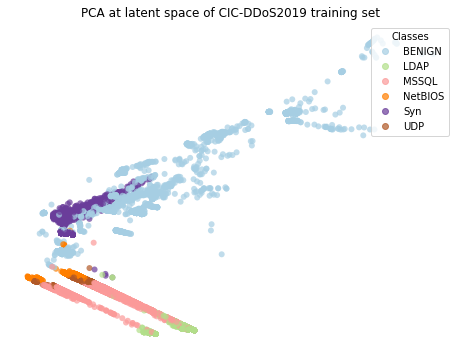

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

X_train_pca, y_train_pca = resample(
    X_train_encode, y_train, n_samples=30000, random_state=42, stratify=y_train)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_train_pca)
fig, ax = plt.subplots(figsize=(8,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_train_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper right", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-DDoS2019 training set")
plt.show()

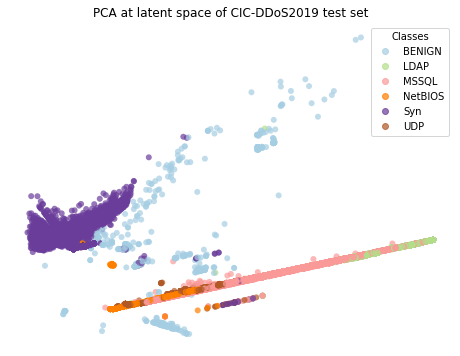

In [19]:
# X_test_pca, y_test_pca = resample(
#     X_test_encode, y_test, n_samples=100000, random_state=42, stratify=y_test)
X_test_pca = X_test_encode
y_test_pca = y_test
pca = PCA(n_components=2)
projected = pca.fit_transform(X_test_pca)
fig, ax = plt.subplots(figsize=(8,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_test_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper right", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-DDoS2019 test set")
plt.show()

In [20]:
classifier = Sequential()
classifier.add(Input(shape=(encoding_dim,)))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(classes, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = classifier.fit(X_train_encode,y_train, batch_size=64, epochs=20, 
                         validation_split=0.2, callbacks=[callback])

Epoch 1/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4255 - accuracy: 0.8764 - val_loss: 0.4371 - val_accuracy: 0.8900
Epoch 2/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1489 - accuracy: 0.9634 - val_loss: 0.2476 - val_accuracy: 0.9690
Epoch 3/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1184 - accuracy: 0.9701 - val_loss: 0.1853 - val_accuracy: 0.9768
Epoch 4/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1074 - accuracy: 0.9714 - val_loss: 0.1573 - val_accuracy: 0.9826
Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1015 - accuracy: 0.9731 - val_loss: 0.1565 - val_accuracy: 0.9831
Epoch 6/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0982 - accuracy: 0.9734 - val_loss: 0.1576 - val_accuracy: 0.9835
Epoch 7/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0961 - accuracy: 0.9737 - val_loss: 0.1768 - val_accuracy:

In [21]:
# predicting on training set
y_train_pred_prob = classifier.predict(X_train_encode)
y_test_pred_prob = classifier.predict(X_test_encode)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

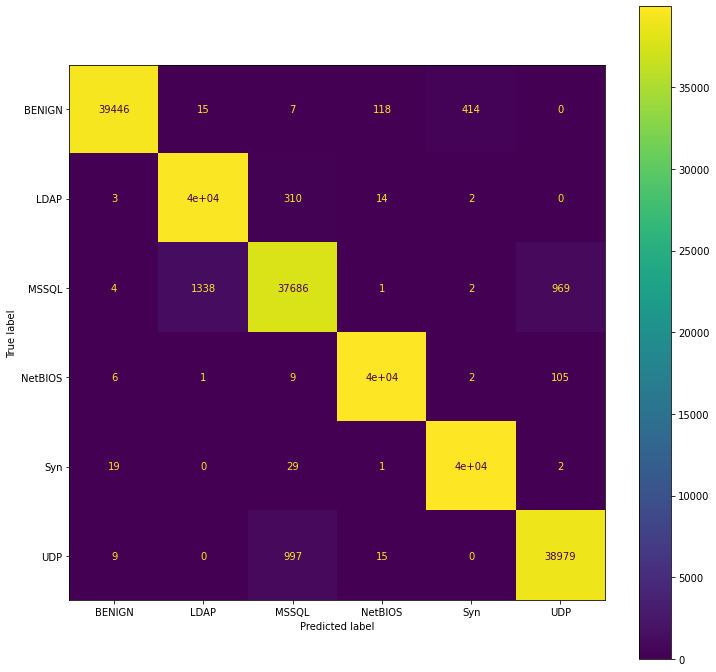

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

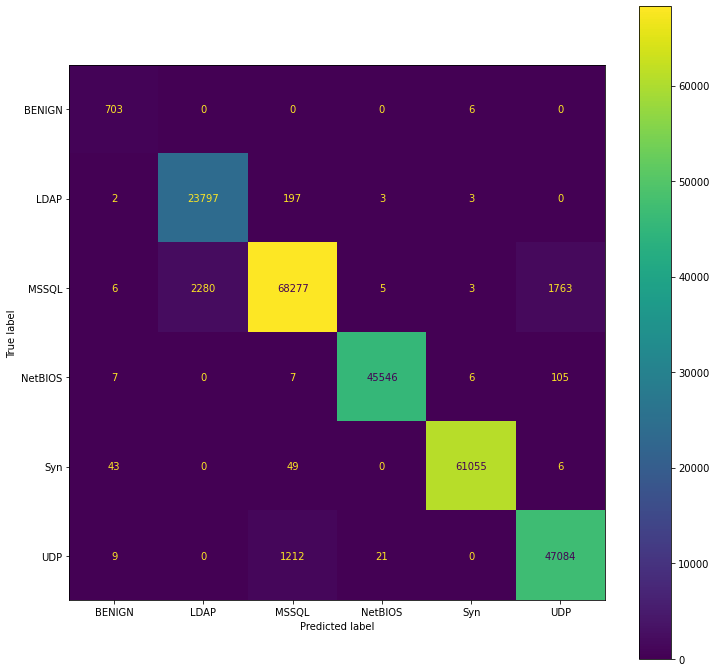

In [23]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [24]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [26]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99     40000
        LDAP       0.97      0.99      0.98     40000
       MSSQL       0.97      0.94      0.95     40000
     NetBIOS       1.00      1.00      1.00     40000
         Syn       0.99      1.00      0.99     40000
         UDP       0.97      0.97      0.97     40000

    accuracy                           0.98    240000
   macro avg       0.98      0.98      0.98    240000
weighted avg       0.98      0.98      0.98    240000



,accuracy,precision,recall,f1_score
BENIGN,0.9975,0.9862,0.999,0.9925
LDAP,0.993,0.9918,0.967,0.9792
MSSQL,0.9847,0.9422,0.9654,0.9536
NetBIOS,0.9989,0.9969,0.9963,0.9966
Syn,0.998,0.9987,0.9896,0.9941
UDP,0.9913,0.9745,0.9731,0.9738


In [27]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

              precision    recall  f1-score   support

      BENIGN       0.91      0.99      0.95       709
        LDAP       0.91      0.99      0.95     24002
       MSSQL       0.98      0.94      0.96     72334
     NetBIOS       1.00      1.00      1.00     45671
         Syn       1.00      1.00      1.00     61153
         UDP       0.96      0.97      0.97     48326

    accuracy                           0.98    252195
   macro avg       0.96      0.98      0.97    252195
weighted avg       0.98      0.98      0.98    252195



In [28]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
BENIGN,0.9997,0.913,0.9915,0.9506
LDAP,0.9901,0.9126,0.9915,0.9504
MSSQL,0.9781,0.979,0.9439,0.9611
NetBIOS,0.9994,0.9994,0.9973,0.9983
Syn,0.9995,0.9997,0.9984,0.9991
UDP,0.9876,0.9617,0.9743,0.968


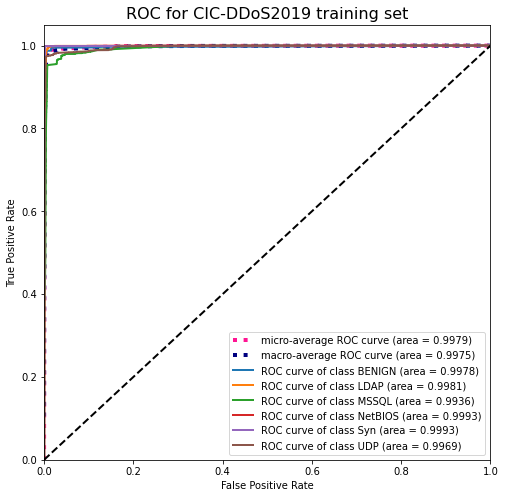

In [29]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for CIC-DDoS2019 training set')

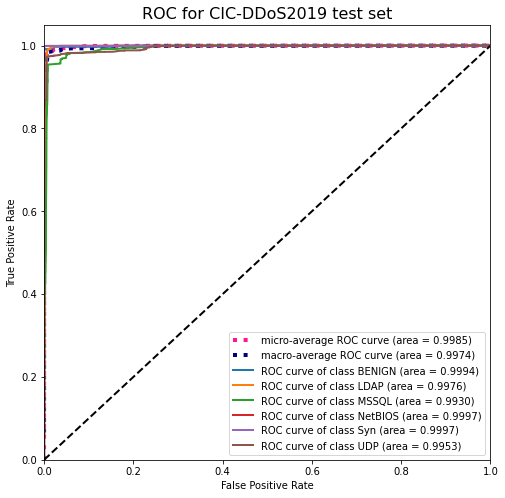

In [30]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for CIC-DDoS2019 test set')